In [325]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import LineString
import plotly.express as px
from shapely.geometry import Point
from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF



In [326]:
dataOrg = pd.read_csv("data/query_Philippines.csv")

In [327]:
dataOrg

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2009-01-01T12:36:55.740Z,9.4300,124.1510,525.300,4.5,mb,53.0,80.3,NaN,0.90,...,2014-11-07T01:38:07.352Z,"20 km SSW of Valencia, Philippines",earthquake,NaN,5.700,NaN,14.0,reviewed,us,us
1,2009-01-02T05:16:44.020Z,7.9510,126.3660,98.400,4.1,mb,13.0,110.5,NaN,0.76,...,2014-11-07T01:38:07.757Z,"8 km N of Boston, Philippines",earthquake,NaN,17.500,NaN,2.0,reviewed,us,us
2,2009-01-03T16:53:11.000Z,6.6520,123.5750,615.100,4.5,mb,51.0,74.0,NaN,0.86,...,2014-11-07T01:38:09.120Z,"51 km W of Taguisa, Philippines",earthquake,NaN,6.200,NaN,17.0,reviewed,us,us
3,2009-01-04T02:19:32.850Z,4.9830,127.4040,83.800,4.6,mb,39.0,63.1,NaN,0.79,...,2014-11-07T01:38:09.798Z,"204 km SE of Pondaguitan, Philippines",earthquake,NaN,10.600,NaN,11.0,reviewed,us,us
4,2009-01-05T08:23:42.220Z,8.0990,121.4440,35.000,4.5,mb,26.0,78.2,NaN,1.14,...,2014-11-07T01:38:10.283Z,"87 km WNW of Siocon, Philippines",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,2024-09-22T07:31:31.184Z,13.9305,120.7585,219.461,4.1,mb,47.0,111.0,8.302,0.95,...,2024-09-28T06:17:00.040Z,"2 km ESE of Balayan, Philippines",earthquake,12.00,8.530,0.097,29.0,reviewed,us,us
9111,2024-09-22T08:22:45.914Z,5.7247,126.9841,133.140,4.4,mb,34.0,115.0,1.933,0.58,...,2024-09-22T08:44:38.040Z,"113 km SE of Pondaguitan, Philippines",earthquake,8.10,6.984,0.105,26.0,reviewed,us,us
9112,2024-09-23T23:41:10.246Z,19.6376,120.5083,15.995,4.5,mb,41.0,114.0,3.209,0.69,...,2024-09-23T23:57:11.040Z,"122 km NNW of Pagudpud, Philippines",earthquake,8.26,3.026,0.100,29.0,reviewed,us,us
9113,2024-09-26T23:27:42.918Z,8.2553,127.3199,10.000,4.7,mb,56.0,109.0,2.089,0.84,...,2024-09-26T23:44:41.040Z,"98 km E of Barcelona, Philippines",earthquake,8.78,1.874,0.065,73.0,reviewed,us,us


In [328]:
dataOrg['DateTime'] = pd.to_datetime(dataOrg['time'])
data = dataOrg.sort_values(by='DateTime')
#selection2 = data['place'].str.contains('Philippines', case=True)
#data = data[selection2]

In [329]:
dataOrg

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,DateTime
0,2009-01-01T12:36:55.740Z,9.4300,124.1510,525.300,4.5,mb,53.0,80.3,NaN,0.90,...,"20 km SSW of Valencia, Philippines",earthquake,NaN,5.700,NaN,14.0,reviewed,us,us,2009-01-01 12:36:55.740000+00:00
1,2009-01-02T05:16:44.020Z,7.9510,126.3660,98.400,4.1,mb,13.0,110.5,NaN,0.76,...,"8 km N of Boston, Philippines",earthquake,NaN,17.500,NaN,2.0,reviewed,us,us,2009-01-02 05:16:44.020000+00:00
2,2009-01-03T16:53:11.000Z,6.6520,123.5750,615.100,4.5,mb,51.0,74.0,NaN,0.86,...,"51 km W of Taguisa, Philippines",earthquake,NaN,6.200,NaN,17.0,reviewed,us,us,2009-01-03 16:53:11+00:00
3,2009-01-04T02:19:32.850Z,4.9830,127.4040,83.800,4.6,mb,39.0,63.1,NaN,0.79,...,"204 km SE of Pondaguitan, Philippines",earthquake,NaN,10.600,NaN,11.0,reviewed,us,us,2009-01-04 02:19:32.850000+00:00
4,2009-01-05T08:23:42.220Z,8.0990,121.4440,35.000,4.5,mb,26.0,78.2,NaN,1.14,...,"87 km WNW of Siocon, Philippines",earthquake,NaN,NaN,NaN,8.0,reviewed,us,us,2009-01-05 08:23:42.220000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9110,2024-09-22T07:31:31.184Z,13.9305,120.7585,219.461,4.1,mb,47.0,111.0,8.302,0.95,...,"2 km ESE of Balayan, Philippines",earthquake,12.00,8.530,0.097,29.0,reviewed,us,us,2024-09-22 07:31:31.184000+00:00
9111,2024-09-22T08:22:45.914Z,5.7247,126.9841,133.140,4.4,mb,34.0,115.0,1.933,0.58,...,"113 km SE of Pondaguitan, Philippines",earthquake,8.10,6.984,0.105,26.0,reviewed,us,us,2024-09-22 08:22:45.914000+00:00
9112,2024-09-23T23:41:10.246Z,19.6376,120.5083,15.995,4.5,mb,41.0,114.0,3.209,0.69,...,"122 km NNW of Pagudpud, Philippines",earthquake,8.26,3.026,0.100,29.0,reviewed,us,us,2024-09-23 23:41:10.246000+00:00
9113,2024-09-26T23:27:42.918Z,8.2553,127.3199,10.000,4.7,mb,56.0,109.0,2.089,0.84,...,"98 km E of Barcelona, Philippines",earthquake,8.78,1.874,0.065,73.0,reviewed,us,us,2024-09-26 23:27:42.918000+00:00


In [330]:
data_rest = data[['DateTime','latitude','longitude','mag']].set_index('DateTime')

In [331]:
data_rest.head()

,latitude,longitude,mag
DateTime,,,
2009-01-01 12:36:55.740000+00:00,9.430,124.151,4.5
2009-01-02 05:16:44.020000+00:00,7.951,126.366,4.1
2009-01-03 16:53:11+00:00,6.652,123.575,4.5
2009-01-04 02:19:32.850000+00:00,4.983,127.404,4.6
2009-01-05 08:23:42.220000+00:00,8.099,121.444,4.5


In [332]:
high_mag_data = data_rest[data_rest['mag']>=5]
low_mag_data = data_rest[data_rest['mag']<5]

In [333]:
full_daily_counts = low_mag_data.resample('D').size()
full_weekly_counts = low_mag_data.resample('W').size()

low_daily_counts = low_mag_data.resample('D').size()
low_weekly_counts = low_mag_data.resample('W').size()

high_daily_counts = high_mag_data.resample('D').size()
high_weekly_counts = high_mag_data.resample('W').size()


Text(0, 0.5, 'Counts')

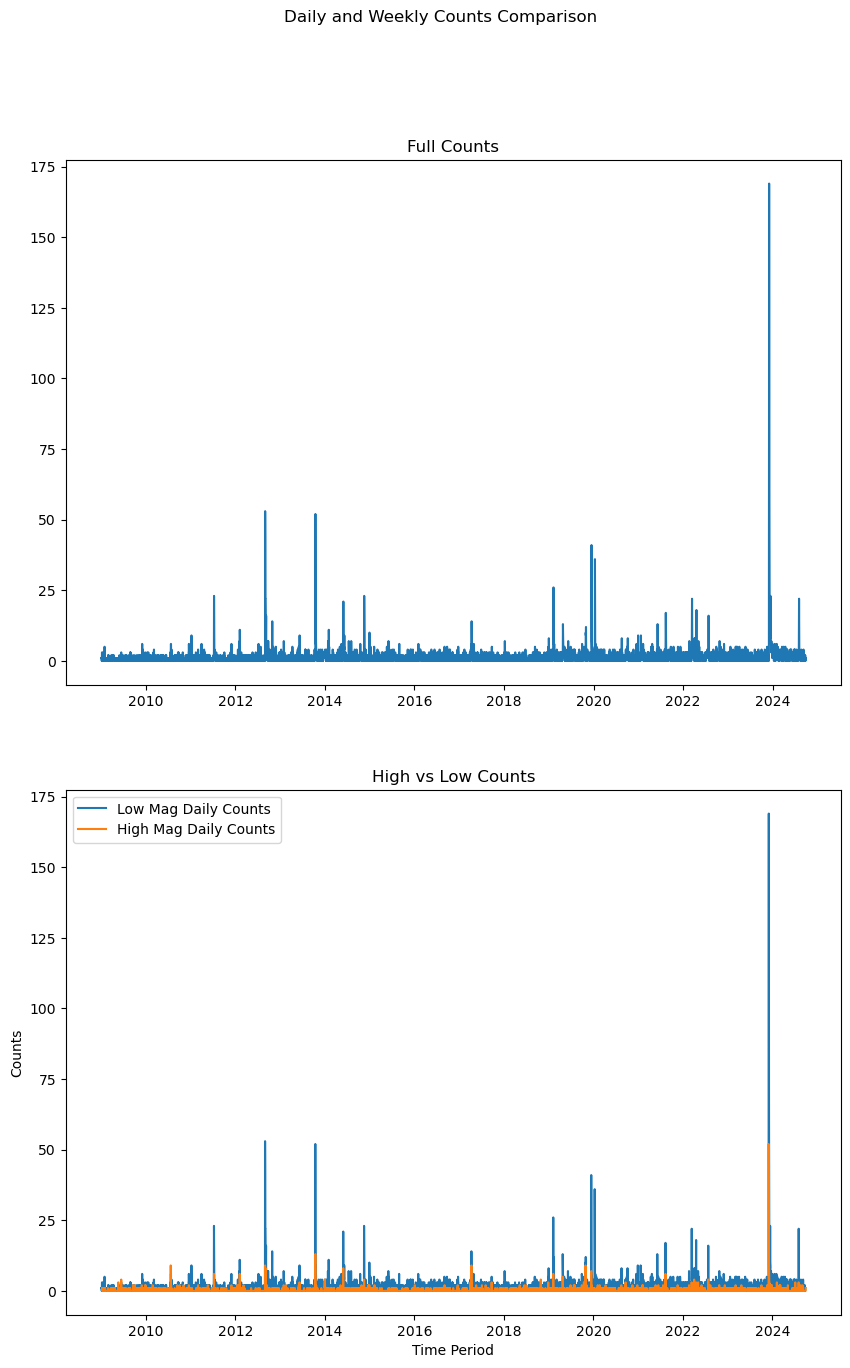

In [334]:
fig, axs = plt.subplots(2, 1, figsize=(10, 15))

axs[0].plot(full_daily_counts, label="Full Daily Counts")
axs[0].set_title("Full Counts")

axs[1].plot(low_daily_counts, label="Low Mag Daily Counts")
axs[1].set_title("High vs Low Counts")

axs[1].plot(high_daily_counts, label="High Mag Daily Counts")
axs[1].legend()
fig.suptitle('Daily and Weekly Counts Comparison')
plt.xlabel('Time Period')
plt.ylabel('Counts')

C:\Users\20204147\AppData\Local\Temp\ipykernel_14300\1456935107.py:1: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



<Axes: >

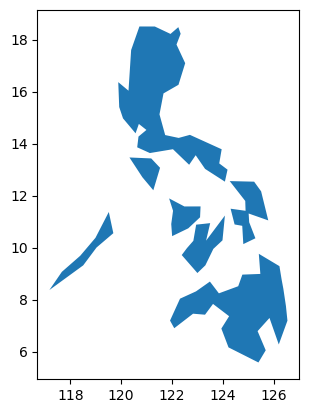

In [335]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

philippines_map = worldmap[worldmap['name'] == 'Philippines']

philippines_map.plot()


<Axes: >

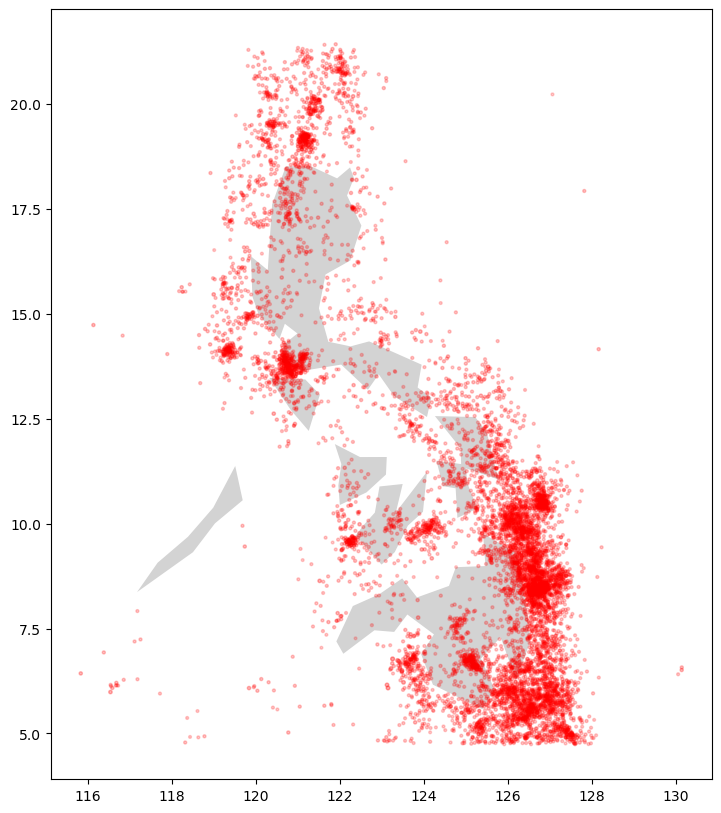

In [336]:
fig, ax = plt.subplots(figsize=(10, 10))

data_rest['geometry'] = data_rest.apply(lambda x: Point(x['longitude'], x['latitude']), axis=1)
data_rest = gpd.GeoDataFrame(data_rest, geometry='geometry')


philippines_map.plot(ax=ax, color='lightgray')  
data_rest.plot(ax=ax, color='red', markersize=data_rest['mag'], alpha=0.05*data_rest['mag'], label='Earthquakes') 




In [337]:
tectonic_plates = pd.read_csv("data/all.csv" )
#https://www.kaggle.com/datasets/cwthompson/tectonic-plate-boundaries?resource=download
tectonic_plates

tectonic_lines = tectonic_plates.groupby('plate').apply(
    lambda group: LineString(zip(group['lon'], group['lat']))
)

tectonic_gdf = gpd.GeoDataFrame(tectonic_lines, columns=['geometry'], geometry='geometry')


c:\Users\20204147\AppData\Local\anaconda3\Lib\site-packages\geopandas\geodataframe.py:2195: UserWarning:

CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326




<Axes: >

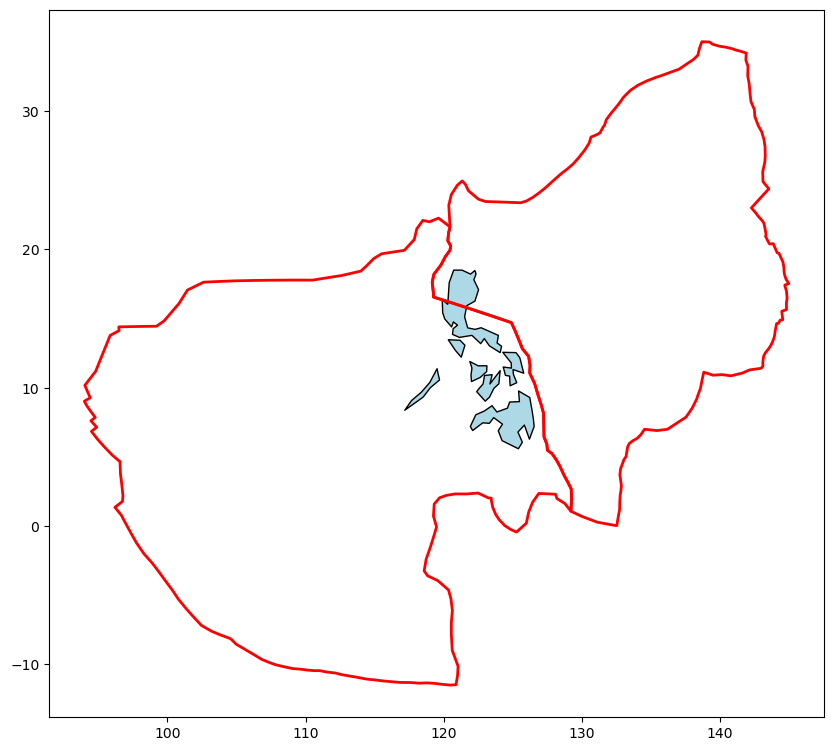

In [338]:
fig, ax = plt.subplots(figsize=(10, 10))


tectonic_gdf_clipped = tectonic_gdf.sjoin(philippines_map)
philippines_map.plot(ax=ax, color='lightblue', edgecolor='black')

tectonic_gdf_clipped.plot(ax=ax, color='red', linewidth=2)


In [339]:
#low_weekly_counts,high_weekly_counts
df = pd.DataFrame({
    'low_mag': low_weekly_counts,
    'high_mag': high_weekly_counts
}).fillna(0)
df.reset_index(inplace=True)

df['Year'] = df['DateTime'].dt.year

In [340]:
df_melted = df.melt(id_vars='DateTime', value_vars=['low_mag', 'high_mag'], 
                    var_name='Magnitude_Type', value_name='Count')


In [341]:
df

,DateTime,low_mag,high_mag,Year
0,2009-01-04 00:00:00+00:00,4,0.0,2009
1,2009-01-11 00:00:00+00:00,7,2.0,2009
2,2009-01-18 00:00:00+00:00,6,2.0,2009
3,2009-01-25 00:00:00+00:00,7,3.0,2009
4,2009-02-01 00:00:00+00:00,14,2.0,2009
...,...,...,...,...
817,2024-09-01 00:00:00+00:00,8,2.0,2024
818,2024-09-08 00:00:00+00:00,7,2.0,2024
819,2024-09-15 00:00:00+00:00,6,0.0,2024
820,2024-09-22 00:00:00+00:00,5,0.0,2024


In [342]:
df_melted['Year'] = df_melted['DateTime'].dt.year

fig = px.line(df_melted, x='DateTime', y='Count',
              color='Magnitude_Type', 
              title='Number of low and high magnitude earthquakes over time per week',
              line_shape='linear')


fig.update_layout(yaxis_title='Count', xaxis_title='Date', showlegend=True)

fig.show()

c:\Users\20204147\AppData\Local\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Question 2 EDA

In [343]:
data_rest.reset_index(inplace=True)

In [344]:
data_rest['time_diff'] = data_rest['DateTime'].diff()
data_rest

# Drop the first row, as it will be a NaN value (first time how no time to subtract from)
data_rest = data_rest[['time_diff']].drop(index=0)
# Convert the time differences to seconds
data_rest['time_diff_seconds'] = pd.to_timedelta(data_rest['time_diff']).dt.total_seconds()


In [345]:
data_rest

,time_diff,time_diff_seconds
1,0 days 16:39:48.280000,59988.280
2,1 days 11:36:26.980000,128186.980
3,0 days 09:26:21.850000,33981.850
4,1 days 06:04:09.370000,108249.370
5,2 days 13:08:51.410000,220131.410
...,...,...
9110,4 days 19:21:43.949000,415303.949
9111,0 days 00:51:14.730000,3074.730
9112,1 days 15:18:24.332000,141504.332
9113,2 days 23:46:32.672000,258392.672


In [346]:
time_diff_data = data_rest['time_diff_seconds'].copy()

# Fitting distributions
# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and béta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)

# Add theoretical density
xs = np.arange(np.min(time_diff_data), np.max(time_diff_data))
print(xs)

# Show a plot with the histogram of the time difference data, and the estimated distributions


# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)
print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))

First moment: 54507.285314351546, Second moment: 9010143787.627407
Normal distribution: 54507.285314351546, 6039099635.287283
Exponential distribution: 1.8346171419707524e-05
Gamma distribution: 0.49196806341460364, 9.02573042442586e-06
[7.56800000e+00 8.56800000e+00 9.56800000e+00 ... 8.22269568e+05
 8.22270568e+05 8.22271568e+05]
KS Test Exponential distribution: KstestResult(statistic=0.189517244595806, pvalue=4.0726823607326515e-287, statistic_location=7131.61, statistic_sign=1)
KS Test Normal distribution: KstestResult(statistic=0.2415557339393848, pvalue=0.0, statistic_location=7.568, statistic_sign=-1)
KS Test Gamma distribution: KstestResult(statistic=0.039867746169953366, pvalue=5.044839148497929e-13, statistic_location=1865.36, statistic_sign=1)


In [347]:
time_diff_data

1        59988.280
2       128186.980
3        33981.850
4       108249.370
5       220131.410
           ...    
9110    415303.949
9111      3074.730
9112    141504.332
9113    258392.672
9114    199551.177
Name: time_diff_seconds, Length: 9114, dtype: float64

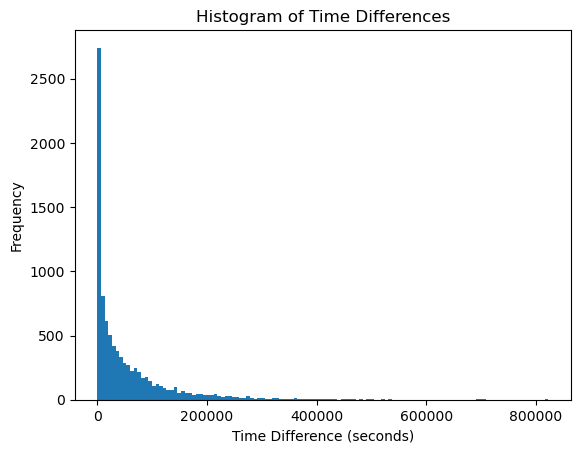

Mean: 54507.285314351546, Variance: 6039762325.908905
KstestResult(statistic=0.189517244595806, pvalue=4.0726823607326515e-287, statistic_location=7131.61, statistic_sign=1) KstestResult(statistic=0.039867746169953366, pvalue=5.044839148497929e-13, statistic_location=1865.36, statistic_sign=1)


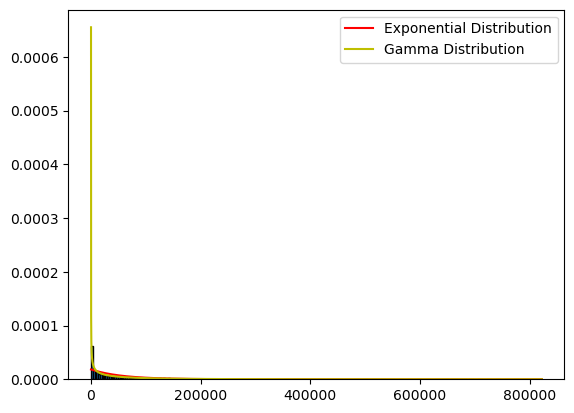

In [348]:
from statsmodels.graphics.tsaplots import plot_acf

plt.hist(time_diff_data, bins='auto')
plt.title('Histogram of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Frequency')
plt.show()

M1 = time_diff_data.mean()
M2 = (time_diff_data**2).mean()
variance_time_diff = time_diff_data.var()
print(f'Mean: {M1}, Variance: {variance_time_diff}')
alphaEst = (M1 ** 2 / (M2 - M1 ** 2))

lamEst = 1/(M1)
betaEst = 1/(M1)
estExpDist = stats.expon(scale=1 / lamEst)
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)



test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)

test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
print(test_exponential,test_gamma)


plt.figure()
plt.hist(time_diff_data, bins=200, rwidth=0.8, edgecolor='black', density=True)
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.legend()
plt.show()

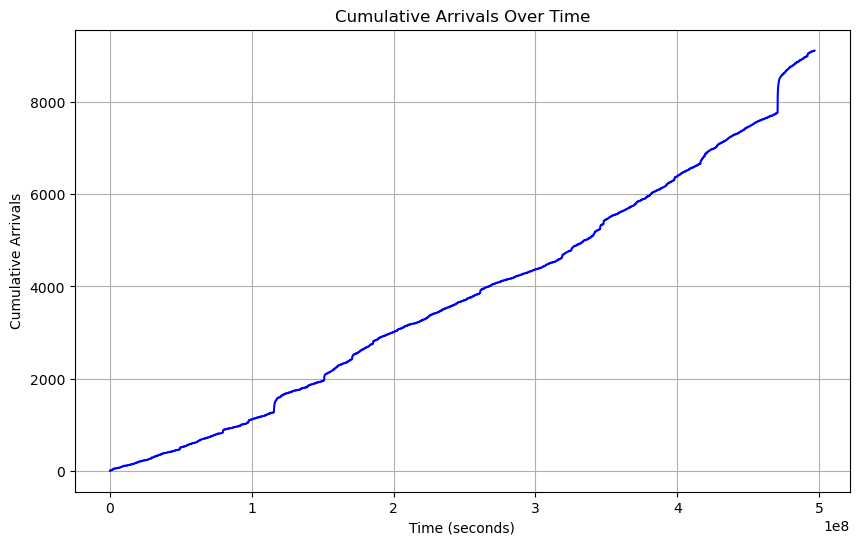

In [349]:

# Calculate arrival times from time differences
arrival_times = time_diff_data.cumsum()

# Create cumulative counts
arrivals = np.arange(0, len(arrival_times) + 1)

# Add point at t=0
arrival_times = np.append([0], arrival_times)

# Create the plot
plt.figure(figsize=(10, 6))
plt.step(arrival_times, arrivals, 'b', where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Arrivals')
plt.title('Cumulative Arrivals Over Time')
plt.grid(True)
plt.show()


Question 3

In [350]:
Q3data = data.copy()


In [351]:
high_mag_data_Q3 = Q3data[Q3data['mag']>=5]
low_mag_data_Q3 = Q3data[Q3data['mag']<5]

high_mag_data_Q3['timediff']  = high_mag_data_Q3['DateTime'].diff()
high_mag_data_Q3  = high_mag_data_Q3.drop(index=10)
low_mag_data_Q3['timediff']  = low_mag_data_Q3['DateTime'].diff()
low_mag_data_Q3 = low_mag_data_Q3.drop(index=0)

C:\Users\20204147\AppData\Local\Temp\ipykernel_14300\3122762967.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\20204147\AppData\Local\Temp\ipykernel_14300\3122762967.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



First moment: 62033.70982860713, Second moment: 11274774810.306906
Normal distribution: 62033.70982860713, 7426593655.207077
Exponential distribution: 1.612026755715399e-05
Gamma distribution: 0.5181623411429972, 8.352915577266417e-06
Uniform distribution: a=8.14, b=902051.68


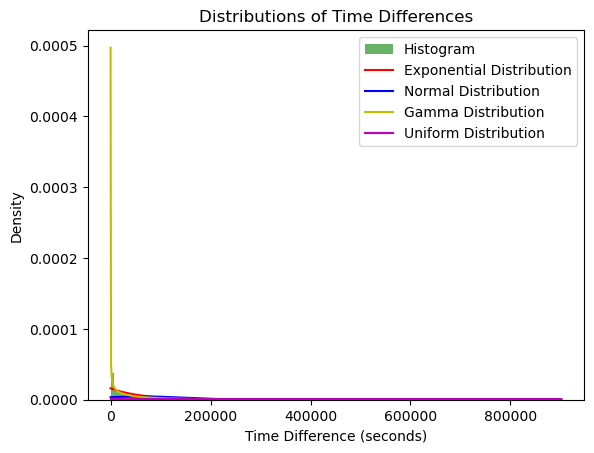

KS Test Exponential distribution: KstestResult(statistic=0.1737543576165751, pvalue=8.089840250333238e-212, statistic_location=8305.339, statistic_sign=1)
KS Test Normal distribution: KstestResult(statistic=0.2358423975083337, pvalue=0.0, statistic_location=8.14, statistic_sign=-1)
KS Test Gamma distribution: KstestResult(statistic=0.03497356107807417, pvalue=6.084077635610786e-09, statistic_location=1865.36, statistic_sign=1)
KS Test Uniform distribution: KstestResult(statistic=0.7153766572867064, pvalue=0.0, statistic_location=157700.66, statistic_sign=1)


In [352]:


# Convert the time differences to seconds
low_mag_data_Q3['time_diff_seconds'] = pd.to_timedelta(low_mag_data_Q3['timediff']).dt.total_seconds()

# Take only relevant column
time_diff_data = low_mag_data_Q3['time_diff_seconds']

# Fitting distributions
# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
low_mag_estExpDist = stats.expon(scale=1 / lamEst)
low_mag_estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
low_mag_estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
low_mag_estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()

# Kolmogorov-Smirnov test
low_mag_test_exponential = stats.kstest(time_diff_data, low_mag_estExpDist.cdf)
low_mag_test_normal = stats.kstest(time_diff_data, low_mag_estNormDist.cdf)
low_mag_test_gamma = stats.kstest(time_diff_data, low_mag_estGammaDist.cdf)
low_mag_test_uniform = stats.kstest(time_diff_data, low_mag_estUniformDist.cdf)

print('KS Test Exponential distribution: ' + str(low_mag_test_exponential))
print('KS Test Normal distribution: ' + str(low_mag_test_normal))
print('KS Test Gamma distribution: ' + str(low_mag_test_gamma))
print('KS Test Uniform distribution: ' + str(low_mag_test_uniform))


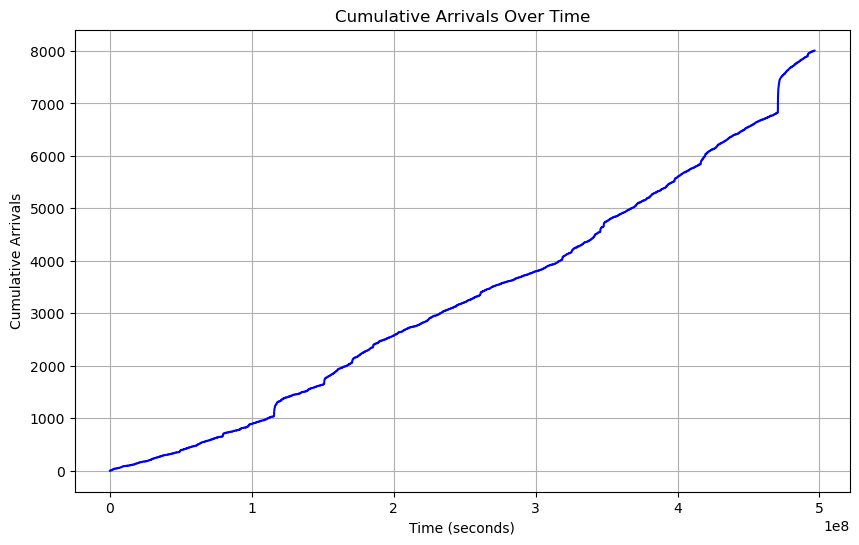

In [353]:

# Calculate arrival times from time differences
arrival_times = time_diff_data.cumsum()

# Create cumulative counts
arrivals = np.arange(0, len(arrival_times) + 1)

# Add point at t=0
arrival_times = np.append([0], arrival_times)

# Create the plot
plt.figure(figsize=(10, 6))
plt.step(arrival_times, arrivals, 'b', where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Arrivals')
plt.title('Cumulative Arrivals Over Time')
plt.grid(True)
plt.show()


First moment: 447749.71835288807, Second moment: 598351983366.083
Normal distribution: 447749.71835288807, 397872173080.99243
Exponential distribution: 2.233390572926867e-06
Gamma distribution: 0.5038799490113629, 1.1253607280088482e-06
Uniform distribution: a=18.874, b=4707171.64


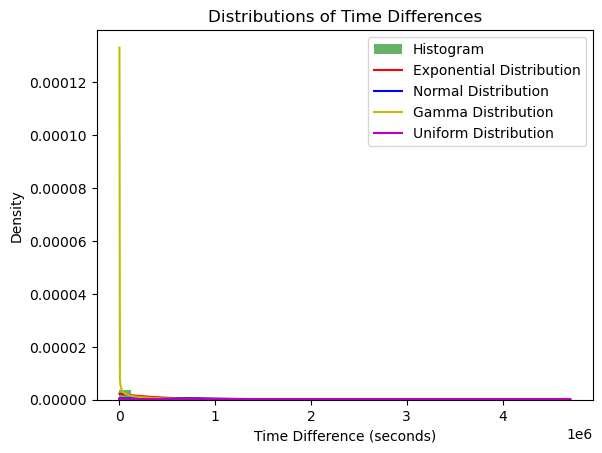

KS Test Exponential distribution: KstestResult(statistic=0.2431336210632884, pvalue=3.7856533139223485e-58, statistic_location=55243.29, statistic_sign=1)
KS Test Normal distribution: KstestResult(statistic=0.23890940339719452, pvalue=3.906447438167927e-56, statistic_location=18.874, statistic_sign=-1)
KS Test Gamma distribution: KstestResult(statistic=0.10713790226499453, pvalue=1.57354974668458e-11, statistic_location=12698.48, statistic_sign=1)
KS Test Uniform distribution: KstestResult(statistic=0.6427051880978312, pvalue=0.0, statistic_location=1019120.216, statistic_sign=1)


In [354]:

# Convert the time differences to seconds
high_mag_data_Q3['time_diff_seconds'] = pd.to_timedelta(high_mag_data_Q3['timediff']).dt.total_seconds()

# Take only relevant column
time_diff_data = high_mag_data_Q3['time_diff_seconds']

# Fitting distributions
# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
high_mag_estExpDist = stats.expon(scale=1 / lamEst)
high_mag_estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
high_mag_estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
high_mag_estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()

# Kolmogorov-Smirnov test
high_mag_test_exponential = stats.kstest(time_diff_data, high_mag_estExpDist.cdf)
high_mag_test_normal = stats.kstest(time_diff_data, high_mag_estNormDist.cdf)
high_mag_test_gamma = stats.kstest(time_diff_data, high_mag_estGammaDist.cdf)
high_mag_test_uniform = stats.kstest(time_diff_data, high_mag_estUniformDist.cdf)

print('KS Test Exponential distribution: ' + str(high_mag_test_exponential))
print('KS Test Normal distribution: ' + str(high_mag_test_normal))
print('KS Test Gamma distribution: ' + str(high_mag_test_gamma))
print('KS Test Uniform distribution: ' + str(high_mag_test_uniform))


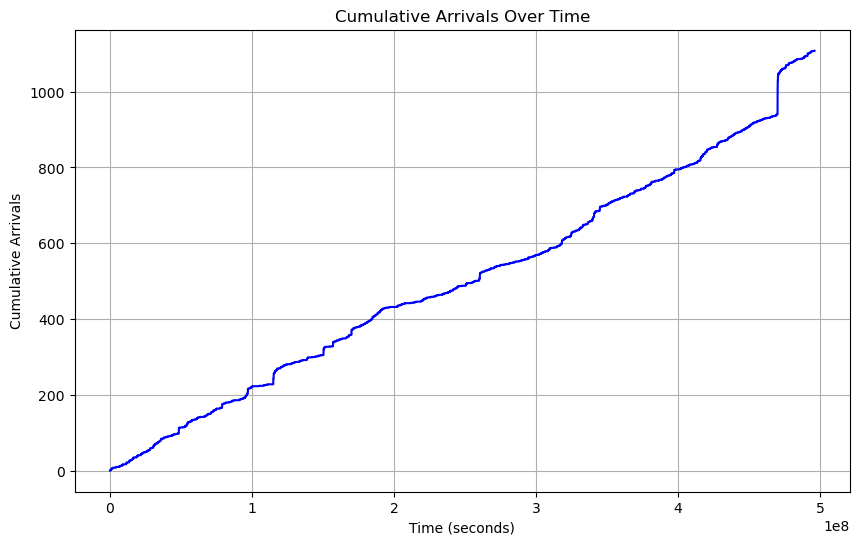

In [355]:

# Calculate arrival times from time differences
arrival_times = time_diff_data.cumsum()

# Create cumulative counts
arrivals = np.arange(0, len(arrival_times) + 1)

# Add point at t=0
arrival_times = np.append([0], arrival_times)

# Create the plot
plt.figure(figsize=(10, 6))
plt.step(arrival_times, arrivals, 'b', where='post')
plt.xlabel('Time (seconds)')
plt.ylabel('Cumulative Arrivals')
plt.title('Cumulative Arrivals Over Time')
plt.grid(True)
plt.show()


In [356]:
low_mag_data_Q3['timediff']

1      0 days 16:39:48.280000
2      1 days 11:36:26.980000
3      0 days 09:26:21.850000
4      1 days 06:04:09.370000
5      2 days 13:08:51.410000
                ...          
9109   0 days 07:56:15.141000
9110   4 days 19:21:43.949000
9111   0 days 00:51:14.730000
9112   1 days 15:18:24.332000
9113   2 days 23:46:32.672000
Name: timediff, Length: 8005, dtype: timedelta64[ns]

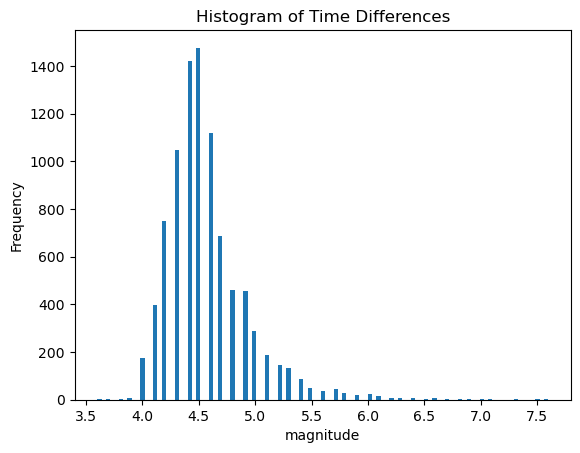

probability that random earthquake has magnitude less than 5 is equal to = 0.8783324190894131


In [357]:
plt.hist(data['mag']
, bins='auto')
plt.title('Histogram of Time Differences')
plt.xlabel('magnitude')
plt.ylabel('Frequency')
plt.show()
prob = len(data[data['mag']<5])/len(data)

print(f'probability that random earthquake has magnitude less than 5 is equal to = {prob}')

In [358]:

#len(data[data['mag']<5]), len(data)-len(data[data['mag']<5])


Based on the resutls of the distribution fitting, we continue with the gamma distribution

In [359]:
low_mag_data_Q3['time_diff_seconds']

1        59988.280
2       128186.980
3        33981.850
4       108249.370
5       220131.410
           ...    
9109     28575.141
9110    415303.949
9111      3074.730
9112    141504.332
9113    258392.672
Name: time_diff_seconds, Length: 8005, dtype: float64

In [360]:
rng = np.random.default_rng()

def simulate_year_from_empdata(empirical_data):
    """Empirical data has to be in seconds and returns a year of earthquakes based on that data"""
    seconds_in_year = 365.25 * 24 * 3600  # Approx. 31,557,600 seconds
    current_time = 0
    year_of_quakes = []
    # Simulate earthquakes until we exceed one year
    while current_time < seconds_in_year:
        # Sample an interarrival time from the empirical data
        sampled_time = rng.choice(empirical_data) #pick random earthquake
        current_time += sampled_time #calc total time
        
        if current_time < seconds_in_year: #if total time is less than a year
            year_of_quakes.append(sampled_time) #add earthquake(time in seconds between the last one and this one) to that year list of earthquakes
            quake_count = len(year_of_quakes)
    return year_of_quakes, quake_count


In [361]:
def sim_num_years(T:int, dataset):
    sim_data = []
    num_of_quakes_each_year = []
    for n in range(T):
        year_of_quakes, quake_count = simulate_year_from_empdata(empirical_data=dataset)
        sim_data.append(year_of_quakes)
        num_of_quakes_each_year.append(quake_count)
    return sim_data, np.array(num_of_quakes_each_year)

In [362]:
num_of_years = 100 #Also the T variable in N(T)

sim_high,sim_high_num_quakes = sim_num_years(num_of_years, high_mag_data_Q3['time_diff_seconds'])
sim_low,sim_low_num_quakes = sim_num_years(num_of_years, low_mag_data_Q3['time_diff_seconds'])

First N1(T) 

In [363]:
# Take the number of earthquakes per year simulated
time_diff_data = np.array(sim_low_num_quakes)

# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)

print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))
print('KS Test Uniform distribution: ' + str(test_uniform))


First moment: 511.95, Second moment: 263287.39
Normal distribution: 511.95, 1194.5875000000233
Exponential distribution: 0.001953315753491552
Gamma distribution: 219.4002553182541, 0.4285579750332144
Uniform distribution: a=421, b=648
KS Test Exponential distribution: KstestResult(statistic=0.5715420307756777, pvalue=1.9587821574991658e-31, statistic_location=446, statistic_sign=-1)
KS Test Normal distribution: KstestResult(statistic=0.08092245317037228, pvalue=0.5035473177352008, statistic_location=532, statistic_sign=1)
KS Test Gamma distribution: KstestResult(statistic=0.07587737976661102, pvalue=0.5856852452616523, statistic_location=532, statistic_sign=1)
KS Test Uniform distribution: KstestResult(statistic=0.6427051880978312, pvalue=0.0, statistic_location=1019120.216, statistic_sign=1)


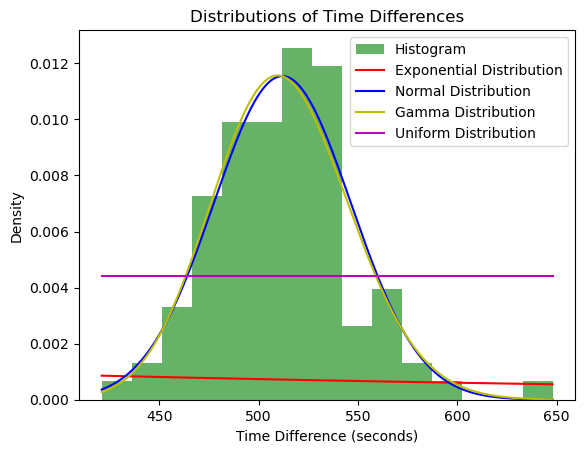

In [364]:

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()


In [365]:
# confidence interval for the mean of the high magnitude quakes
s2 = alphaEst/(betaEst**2)
m = np.mean(sim_low_num_quakes)
z =  1.96
half_width = z * np.sqrt(s2/len(sim_low_num_quakes))


lower_bound = max(0, m - half_width)
upper_bound = m + half_width

# Confidence interval
interval = (lower_bound, upper_bound)


print(M1)
print(interval)


511.95
(505.17569019013735, 518.7243098098626)


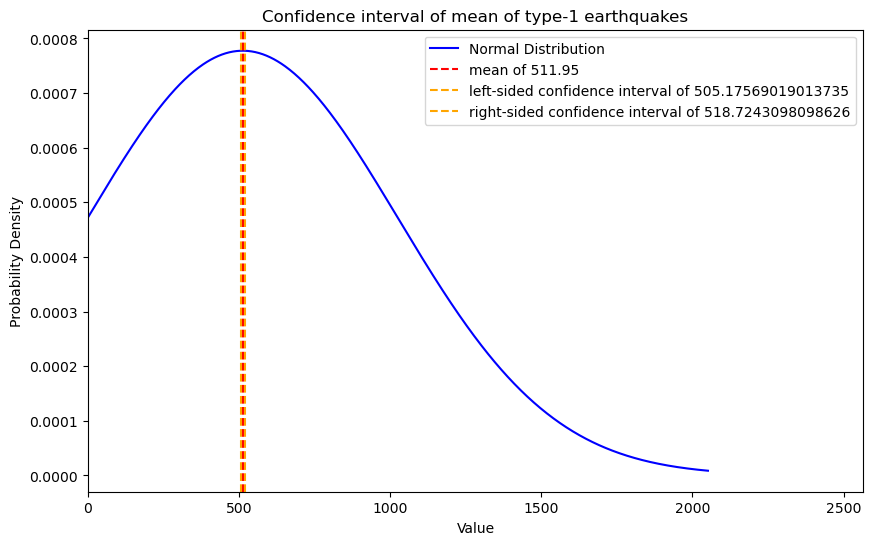

In [366]:
from scipy.stats import norm

mean = M1
std_dev = np.sqrt(M2) # std dev approx from the interval

# Generate x values around the mean
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y_values = norm.pdf(x_values, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Normal Distribution", color="blue")

# Plot the vertical line at the given point
plt.axvline(mean, color='red', linestyle='--', label=f'mean of {mean}')
plt.axvline(interval[0], color='orange', linestyle='--', label=f'left-sided confidence interval of {interval[0]}')
plt.axvline(interval[1], color='orange', linestyle='--', label=f'right-sided confidence interval of {interval[1]}')

# Add labels and title
plt.title("Confidence interval of mean of type-1 earthquakes")
plt.xlim((0,M1+std_dev*4))
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


Second N2(T)

In [367]:
# Take the number of earthquakes per year simulated
time_diff_data = np.array(sim_high_num_quakes)

# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)

print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))
print('KS Test Uniform distribution: ' + str(test_uniform))


First moment: 72.08, Second moment: 5337.08
Normal distribution: 72.08, 141.5536000000002
Exponential distribution: 0.013873473917869035
Gamma distribution: 36.703597789105984, 0.5092064066191174
Uniform distribution: a=45, b=105
KS Test Exponential distribution: KstestResult(statistic=0.4872400816583294, pvalue=2.127952162379433e-22, statistic_location=54, statistic_sign=-1)
KS Test Normal distribution: KstestResult(statistic=0.06089744318457857, pvalue=0.8300457898832577, statistic_location=76, statistic_sign=1)
KS Test Gamma distribution: KstestResult(statistic=0.06250696756173935, pvalue=0.8061265983551217, statistic_location=73, statistic_sign=-1)
KS Test Uniform distribution: KstestResult(statistic=0.6427051880978312, pvalue=0.0, statistic_location=1019120.216, statistic_sign=1)


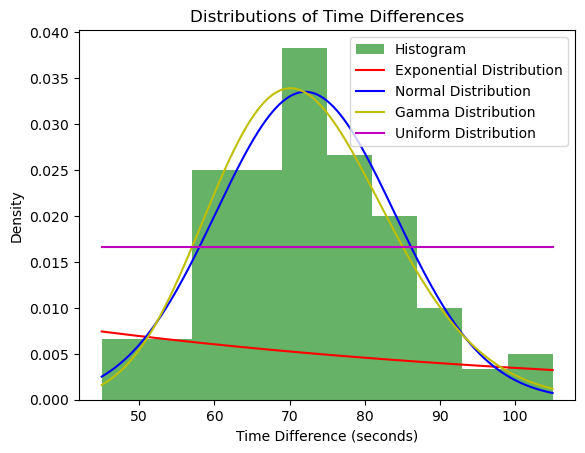

In [368]:

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()


In [369]:
# confidence interval for the mean of the high magnitude quakes
s2 = alphaEst/(betaEst**2)
m = np.mean(sim_high_num_quakes)
z =  1.96
halfWidth = z * np.sqrt(s2/len(sim_high_num_quakes))


lower_bound = max(0, m - half_width)
upper_bound = m + half_width

# Confidence interval
interval = (lower_bound, upper_bound)
print(M1)
print(interval)





72.08
(65.30569019013738, 78.85430980986261)


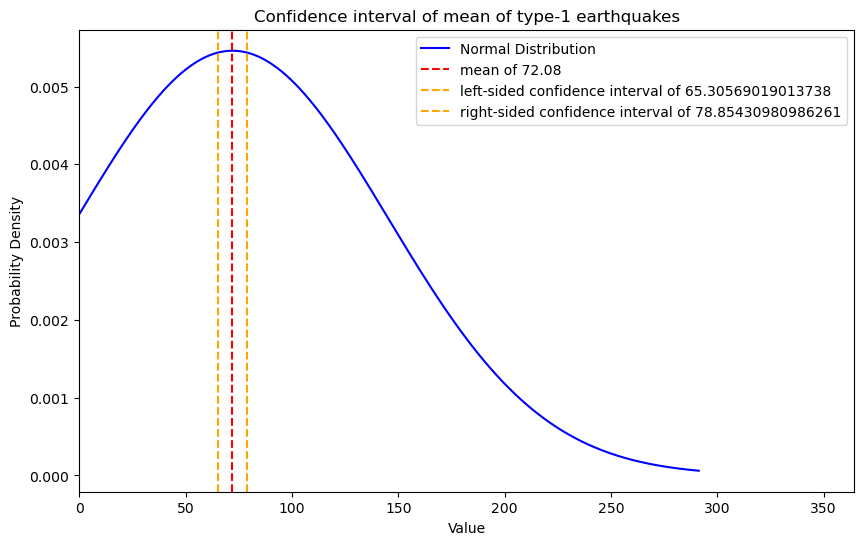

In [370]:
mean = M1
std_dev = np.sqrt(M2) # std dev approx from the interval

# Generate x values around the mean
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y_values = norm.pdf(x_values, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Normal Distribution", color="blue")

# Plot the vertical line at the given point
plt.axvline(mean, color='red', linestyle='--', label=f'mean of {mean}')
plt.axvline(interval[0], color='orange', linestyle='--', label=f'left-sided confidence interval of {interval[0]}')
plt.axvline(interval[1], color='orange', linestyle='--', label=f'right-sided confidence interval of {interval[1]}')

# Add labels and title
plt.title("Confidence interval of mean of type-1 earthquakes")
plt.xlim((0,M1+std_dev*4))
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


N(T) = N1(T) + N2(T)

In [371]:
high_mag_data_Q3['time_diff_seconds'],low_mag_data_Q3['time_diff_seconds']

(12       203055.000
 13        36467.200
 19       540890.290
 22       119600.070
 28       328154.980
            ...     
 9085     667149.334
 9091     388074.620
 9094     253639.470
 9095       2340.015
 9114    2185068.091
 Name: time_diff_seconds, Length: 1108, dtype: float64,
 1        59988.280
 2       128186.980
 3        33981.850
 4       108249.370
 5       220131.410
            ...    
 9109     28575.141
 9110    415303.949
 9111      3074.730
 9112    141504.332
 9113    258392.672
 Name: time_diff_seconds, Length: 8005, dtype: float64)

In [372]:
total_sim_num_quakes = sim_high_num_quakes+sim_low_num_quakes

In [373]:
# Take the number of earthquakes per year simulated
time_diff_data = total_sim_num_quakes

# First and second moment
M1 = np.mean(time_diff_data)  # first moment
M2 = np.mean(time_diff_data ** 2)  # second moment
print(f'First moment: {M1}, Second moment: {M2}')

# Normal Distribution: Estimates for mu and sigma^2
muEst = M1
sigma2Est = M2 - M1 ** 2
print(f'Normal distribution: {muEst}, {sigma2Est}')

# Exponential Distribution: Estimates for lambda
lamEst = 1 / M1
print(f'Exponential distribution: {lamEst}')

# Gamma Distribution: Estimates for alpha and beta
alphaEst = M1 ** 2 / (M2 - M1 ** 2)
betaEst = M1 / (M2 - M1 ** 2)
print(f'Gamma distribution: {alphaEst}, {betaEst}')

# Uniform Distribution: Estimates for a and b
aEst = np.min(time_diff_data)
bEst = np.max(time_diff_data)
print(f'Uniform distribution: a={aEst}, b={bEst}')

# The estimated distributions
estExpDist = stats.expon(scale=1 / lamEst)
estNormDist = stats.norm(muEst, np.sqrt(sigma2Est))
estGammaDist = stats.gamma(alphaEst, scale=1 / betaEst)
estUniformDist = stats.uniform(loc=aEst, scale=bEst - aEst)

# Kolmogorov-Smirnov test
test_exponential = stats.kstest(time_diff_data, estExpDist.cdf)
test_normal = stats.kstest(time_diff_data, estNormDist.cdf)
test_gamma = stats.kstest(time_diff_data, estGammaDist.cdf)

print('KS Test Exponential distribution: ' + str(test_exponential))
print('KS Test Normal distribution: ' + str(test_normal))
print('KS Test Gamma distribution: ' + str(test_gamma))
print('KS Test Uniform distribution: ' + str(test_uniform))


First moment: 584.03, Second moment: 342387.53
Normal distribution: 584.03, 1296.4891000000644
Exponential distribution: 0.0017122408095474548
Gamma distribution: 263.0882441664824, 0.4504704281740363
Uniform distribution: a=490, b=712
KS Test Exponential distribution: KstestResult(statistic=0.5678566843990249, pvalue=5.3621567935636255e-31, statistic_location=490, statistic_sign=-1)
KS Test Normal distribution: KstestResult(statistic=0.06934511804960497, pvalue=0.6956804037079108, statistic_location=597, statistic_sign=1)
KS Test Gamma distribution: KstestResult(statistic=0.0638535392918401, pvalue=0.7853472247284076, statistic_location=564, statistic_sign=-1)
KS Test Uniform distribution: KstestResult(statistic=0.6427051880978312, pvalue=0.0, statistic_location=1019120.216, statistic_sign=1)


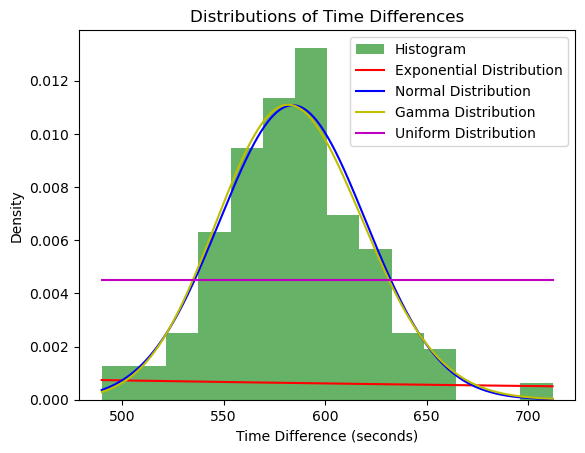

In [374]:

# Add theoretical density
xs = np.linspace(aEst, bEst, 1000)  # Ensure xs covers the uniform range

# Show a plot with the histogram of the time difference data, and the estimated distributions
plt.hist(time_diff_data, bins='auto', density=True, alpha=0.6, color='g', label='Histogram')
plt.plot(xs, estExpDist.pdf(xs), 'r', label='Exponential Distribution')
plt.plot(xs, estNormDist.pdf(xs), 'b', label='Normal Distribution')
plt.plot(xs, estGammaDist.pdf(xs), 'y', label='Gamma Distribution')
plt.plot(xs, estUniformDist.pdf(xs), 'm', label='Uniform Distribution')
plt.legend()
plt.title('Distributions of Time Differences')
plt.xlabel('Time Difference (seconds)')
plt.ylabel('Density')
plt.show()


584.03
(577.2556901901373, 590.8043098098626)


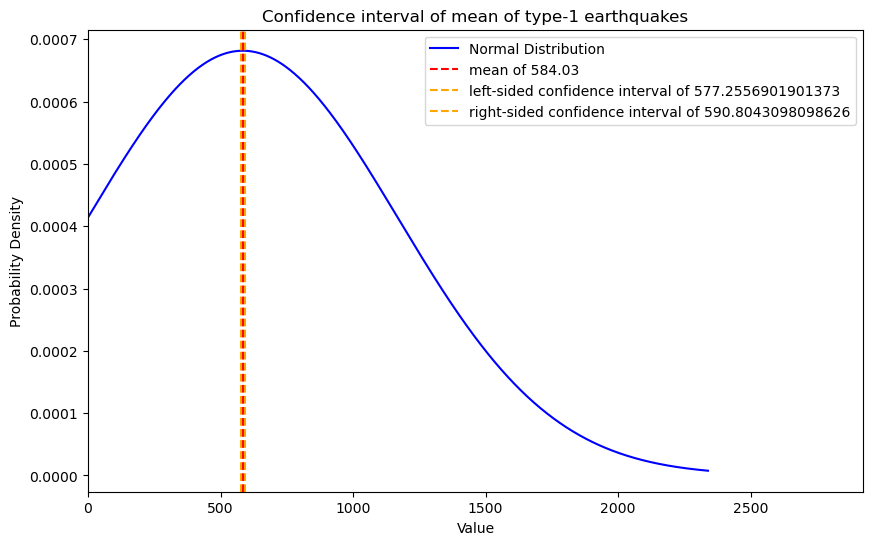

In [375]:
# confidence interval for the mean of the high magnitude quakes
s2 = alphaEst/(betaEst**2)
m = np.mean(total_sim_num_quakes)
z =  1.96
halfWidth = z * np.sqrt(s2/len(total_sim_num_quakes))


lower_bound = max(0, m - half_width)
upper_bound = m + half_width

# Confidence interval
interval = (lower_bound, upper_bound)
print(M1)
print(interval)

mean = M1
std_dev = np.sqrt(M2) # std dev approx from the interval

# Generate x values around the mean
x_values = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)
y_values = norm.pdf(x_values, mean, std_dev)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label="Normal Distribution", color="blue")

# Plot the vertical line at the given point
plt.axvline(mean, color='red', linestyle='--', label=f'mean of {mean}')
plt.axvline(interval[0], color='orange', linestyle='--', label=f'left-sided confidence interval of {interval[0]}')
plt.axvline(interval[1], color='orange', linestyle='--', label=f'right-sided confidence interval of {interval[1]}')

# Add labels and title
plt.title("Confidence interval of mean of type-1 earthquakes")
plt.xlim((0,M1+std_dev*4))
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


